<a href="https://colab.research.google.com/github/annasajkh/clip-experiment/blob/main/clip_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Apr 21 06:08:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install git+https://github.com/openai/CLIP.git


import torch
import clip
from torch.optim import AdamW
import torchvision.transforms as transforms
from PIL import Image
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn


normalize_clip = transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

augmentation = nn.Sequential(
  transforms.RandomHorizontalFlip(0.5),
  transforms.RandomAffine(degrees=30, translate=(0.0, 0.3)),
  transforms.RandomCrop(size=(224, 224))
)

device = "cuda" if torch.cuda.is_available() else "cpu"

clip_model, _ = clip.load("ViT-B/32", device=device)

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-t08f62i6
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-t08f62i6
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369328 sha256=21662bba798c245675219a5d3d700bbec2760a80dd2b5b3f9b2e8d166a253874
  Stored in directory: /tmp/pip-ephem-wheel-cache-6h0gydyz/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 185MiB/s]


In [ ]:
class Upscaler(nn.Module):
  def __init__(self):
    super().__init__()

    self.mapper = nn.Sequential(
        nn.Linear(512, 512 * 4),
        nn.GELU(),
        nn.Linear(512 * 4, 512),
        nn.GELU()
    )
    
    self.layers = nn.Sequential(
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(512, 256, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1),
        nn.GELU(),
        
        nn.Upsample(scale_factor=3, mode="bilinear", align_corners=True),
        nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1),
        nn.Tanh()
        )
    
  def forward(self, x):
    x = self.mapper(x)
    return self.layers(x.unsqueeze(-1).unsqueeze(-1))

In [ ]:
text = "red apple"

lr_init = 3e-4

steps = 1000

weight_decay = 0.1
 
image_augmentation_count = 4

show_interval = 50

  0%|          | 0/1000 [00:00<?, ?it/s]


red apple
Loss: 4.66015625


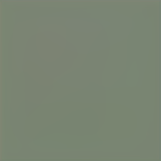

  5%|▍         | 49/1000 [00:03<00:54, 17.32it/s]


red apple
Loss: 3.06640625


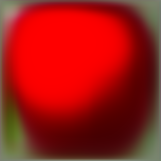

 10%|▉         | 99/1000 [00:06<00:51, 17.60it/s]


red apple
Loss: 2.9765625


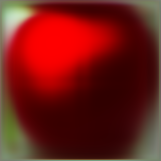

 15%|█▍        | 149/1000 [00:09<01:21, 10.38it/s]


red apple
Loss: 2.888671875


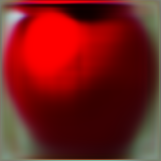

 20%|█▉        | 199/1000 [00:15<00:59, 13.39it/s]


red apple
Loss: 2.8125


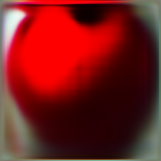

 25%|██▍       | 249/1000 [00:18<00:43, 17.38it/s]


red apple
Loss: 2.78515625


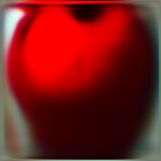

 30%|██▉       | 299/1000 [00:21<00:40, 17.17it/s]


red apple
Loss: 2.765625


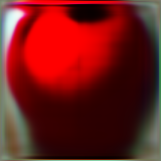

 35%|███▍      | 349/1000 [00:24<00:37, 17.24it/s]


red apple
Loss: 2.75


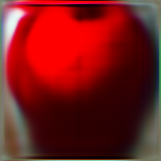

 40%|███▉      | 399/1000 [00:27<00:34, 17.65it/s]


red apple
Loss: 2.75


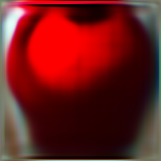

 45%|████▍     | 449/1000 [00:29<00:31, 17.33it/s]


red apple
Loss: 2.744140625


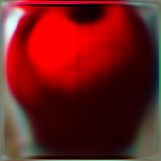

 50%|████▉     | 499/1000 [00:32<00:29, 16.97it/s]


red apple
Loss: 2.734375


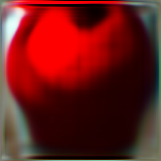

 55%|█████▍    | 549/1000 [00:35<00:26, 17.28it/s]


red apple
Loss: 2.68359375


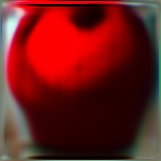

 60%|█████▉    | 599/1000 [00:38<00:23, 16.99it/s]


red apple
Loss: 2.671875


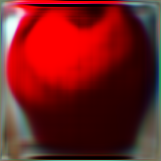

 65%|██████▍   | 649/1000 [00:41<00:20, 17.31it/s]


red apple
Loss: 2.662109375


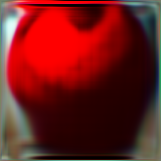

 70%|██████▉   | 699/1000 [00:44<00:17, 17.20it/s]


red apple
Loss: 2.66796875


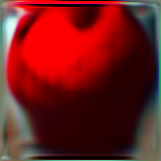

 75%|███████▍  | 749/1000 [00:47<00:14, 17.03it/s]


red apple
Loss: 2.654296875


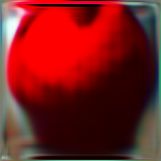

 80%|███████▉  | 799/1000 [00:50<00:12, 16.44it/s]


red apple
Loss: 2.681640625


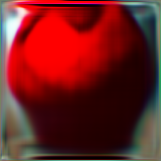

 85%|████████▍ | 849/1000 [00:53<00:08, 16.90it/s]


red apple
Loss: 2.623046875


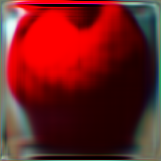

 90%|████████▉ | 899/1000 [00:56<00:05, 16.99it/s]


red apple
Loss: 2.60546875


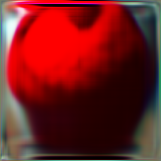

 95%|█████████▍| 949/1000 [00:59<00:02, 17.37it/s]


red apple
Loss: 2.62890625


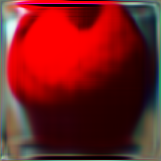

100%|██████████| 1000/1000 [01:02<00:00, 15.99it/s]

red apple
Loss: 2.626953125


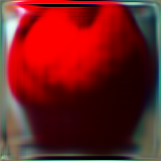

In [ ]:
upscaler = Upscaler()
upscaler.to(device)

text_tokenized = clip.tokenize([text]).to(device)

rand_latent = torch.randn(1, 512).to(device)

optimizer = AdamW(upscaler.parameters(), lr=lr_init, weight_decay=weight_decay)

for i in tqdm(range(steps)):

    y = upscaler(rand_latent)
    y_norm = (y * 127.5 + 128).clamp(0, 255) / 255
    
    img = normalize_clip(y_norm)
    
    image = F.interpolate(img, (224, 224))

    images = torch.zeros(image_augmentation_count, 3, 224, 224).to(device)
    
    for j in range(image_augmentation_count - 1):
        images[j] = augmentation(image)
    
    images[-1] = image
    
    texts = torch.repeat_interleave(text_tokenized, image_augmentation_count, dim=0)
    
    loss = 1 / clip_model(images, texts)[0].mean() * 100
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % show_interval == 0:
        print("\n" + text)
        print("Loss: " + str(loss.item()))
        
        with torch.no_grad():
            generated = (y.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
            display(Image.fromarray(generated[0].cpu().numpy(), "RGB"))
    
    

print(text)
print("Loss: " + str(loss.item()))

with torch.no_grad():
    generated = (y.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    display(Image.fromarray(generated[0].cpu().numpy(), "RGB"))